In [30]:
import warnings
import numpy as np
from preprocessing_utils import get_game_data
from cv_tuning import run_cross_validation
from sklearn.exceptions import ConvergenceWarning
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.pipeline import Pipeline
from sklearn import metrics

warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")

In [2]:
df_games = get_game_data()
X = df_games.drop(columns='Team1 result')

le = LabelEncoder()
le.fit(['loss', 'win'])
y = le.transform(df_games['Team1 result'])

Split into training and testing sets with 80/20 split.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Next we build a PCA pipeline, standardizing data before applying PCA and keep enough components to retain 99% of 
variance.

In [23]:
scale = StandardScaler()
pca = PCA(n_components=.99)
scale_pca_pipe = Pipeline([('scaler', scale), ('pca', pca)])
X_train_pca = scale_pca_pipe.fit_transform(X_train)

In [342]:
'''model_param_grid = {'max_depth': [x for x in range(1, 10)]}
grid_search = GridSearchCV(DecisionTreeClassifier(), model_param_grid, scoring='accuracy', cv=10)
grid_search.fit(X_train, y_train)'''

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
         

In [344]:
#grid_search.best_score_


0.7173076923076923

In [24]:
kbest =  SelectKBest(mutual_info_classif, k=10)
X_train_kbest = kbest.fit_transform(X_train, y_train)

Starting run 1 out of 10
Starting run 2 out of 10
Starting run 3 out of 10
Starting run 4 out of 10
Starting run 5 out of 10
Starting run 6 out of 10
Starting run 7 out of 10
Starting run 8 out of 10
Starting run 9 out of 10
Starting run 10 out of 10
0.8160328439676267
{'n_estimators': 20}
[0.76579945 0.81603284 0.7947819  0.79844673 0.81453369 0.79965227
 0.81450405 0.80874741 0.8146151  0.81495577]


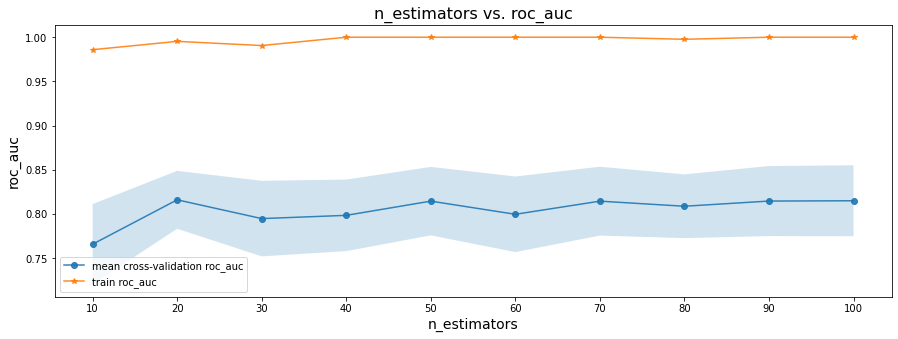

In [115]:
estimators = [{'n_estimators':x} for x in range(10,101,10)]
rf_scale = StandardScaler()
cv_results = run_cross_validation(rf_scale.fit_transform(X_train), y_train, estimators, RandomForestClassifier, scoring='roc_auc')
print(max(cv_results[0]))
print(cv_results[3])
print(cv_results[0])

Starting run 1 out of 9
Starting run 2 out of 9
Starting run 3 out of 9
Starting run 4 out of 9
Starting run 5 out of 9
Starting run 6 out of 9
Starting run 7 out of 9
Starting run 8 out of 9
Starting run 9 out of 9
0.754627083691356
{'max_depth': 2}
[0.71136364 0.75462708 0.75442516 0.70937446 0.66151401 0.69197027
 0.65660766 0.65589878 0.66794982]


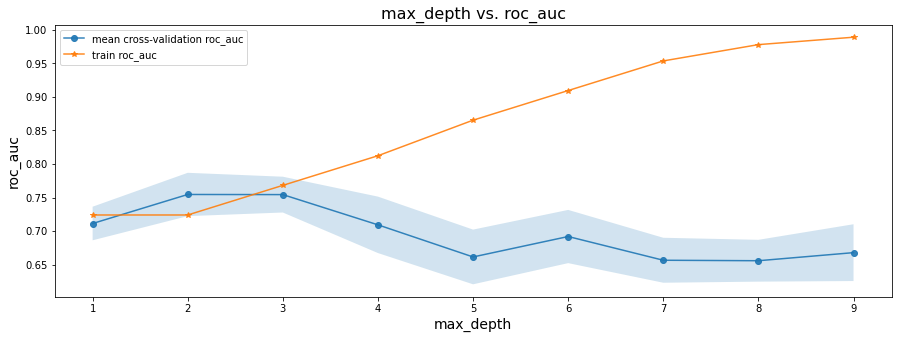

In [25]:
depths = [{'max_depth':x} for x in range(1, 10)]
cv_results = run_cross_validation(X_train_pca, y_train, depths, DecisionTreeClassifier, scoring='roc_auc')
print(max(cv_results[0]))
print(cv_results[3])
print(cv_results[0])

Starting run 1 out of 9
Starting run 2 out of 9
Starting run 3 out of 9
Starting run 4 out of 9
Starting run 5 out of 9
Starting run 6 out of 9
Starting run 7 out of 9
Starting run 8 out of 9
Starting run 9 out of 9
0.7863421550094519
{'max_depth': 3}
[0.72401186 0.75873432 0.78634216 0.7751203  0.74011858 0.71715501
 0.70998024 0.71882626 0.68213611]


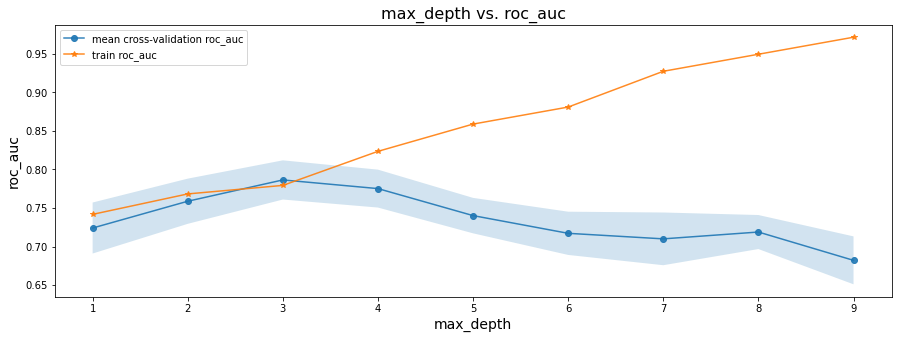

In [33]:
depths = [{'max_depth':x} for x in range(1, 10)]
cv_results = run_cross_validation(X_train, y_train, depths, DecisionTreeClassifier, scoring='roc_auc')
print(max(cv_results[0]))
print(cv_results[3])
print(cv_results[0])

[Text(167.4, 181.2, 'WL% * SOS Norm Diff <= 0.001\ngini = 0.5\nsamples = 453\nvalue = [229, 224]'),
 Text(83.7, 108.72, 'W-L% Norm Diff <= -0.01\ngini = 0.387\nsamples = 236\nvalue = [174, 62]'),
 Text(41.85, 36.23999999999998, 'gini = 0.254\nsamples = 141\nvalue = [120, 21]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.491\nsamples = 95\nvalue = [54, 41]'),
 Text(251.10000000000002, 108.72, 'Adjusted WL% Norm Diff <= -0.561\ngini = 0.378\nsamples = 217\nvalue = [55, 162]'),
 Text(209.25, 36.23999999999998, 'gini = 0.408\nsamples = 28\nvalue = [20, 8]'),
 Text(292.95, 36.23999999999998, 'gini = 0.302\nsamples = 189\nvalue = [35, 154]')]

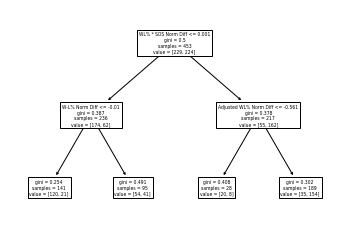

In [34]:
tree_model = DecisionTreeClassifier(max_depth=2)
tree_model.fit(X_train, y_train)
plot_tree(tree_model, feature_names=X_train.columns)

Starting run 1 out of 13
Starting run 2 out of 13
Starting run 3 out of 13
Starting run 4 out of 13
Starting run 5 out of 13
Starting run 6 out of 13
Starting run 7 out of 13
Starting run 8 out of 13
Starting run 9 out of 13
Starting run 10 out of 13
Starting run 11 out of 13
Starting run 12 out of 13
Starting run 13 out of 13
0.828685463659148
{'hidden_layer_sizes': (50,)}
[0.75072682 0.78989787 0.81165977 0.815901   0.8218396  0.82868546
 0.81235025 0.81445175 0.81758145 0.80457644 0.81069298 0.82377444
 0.8159881 ]


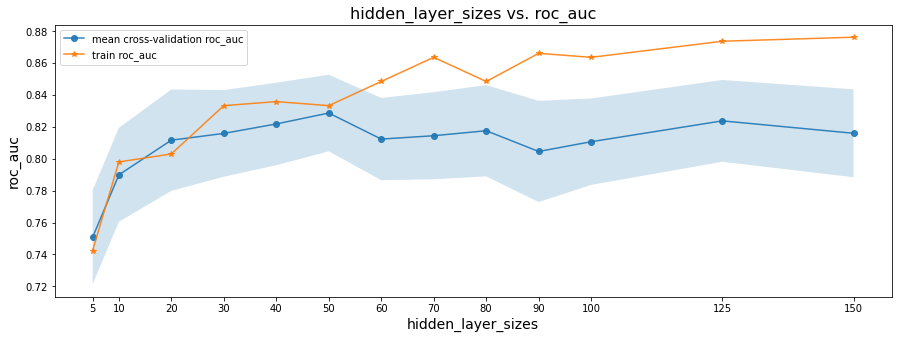

In [188]:
hidden_layer_sizes = [{'hidden_layer_sizes':x} for x in [(5,), (10,),(20,),(30,),(40,), (50,), (60,),(70,),(80,),(90,),(100,), (125,), (150,)]]
cv_results = run_cross_validation(X_train_pca, y_train, hidden_layer_sizes, MLPClassifier, scoring='roc_auc', plot_args={'x_ticks': [x['hidden_layer_sizes'][0] for x in hidden_layer_sizes]})
print(max(cv_results[0]))
print(cv_results[3])
print(cv_results[0])

Starting run 1 out of 12
Starting run 2 out of 12
Starting run 3 out of 12
Starting run 4 out of 12
Starting run 5 out of 12
Starting run 6 out of 12
Starting run 7 out of 12
Starting run 8 out of 12
Starting run 9 out of 12
Starting run 10 out of 12
Starting run 11 out of 12
Starting run 12 out of 12
0.7719269102990033
{'hidden_layer_sizes': (30,)}
[0.69684385 0.74091916 0.75071982 0.77192691 0.7503876  0.75741971
 0.75299003 0.75542636 0.77192691 0.75775194 0.7576412  0.74606866]


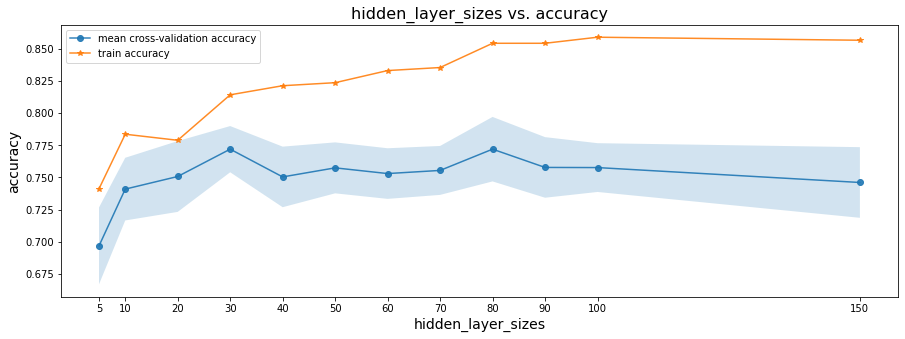

In [13]:
hidden_layer_sizes = [{'hidden_layer_sizes':x} for x in [(5,), (10,),(20,),(30,),(40,), (50,), (60,),(70,),(80,),(90,),(100,), (150,)]]
cv_results = run_cross_validation(X_train, y_train, hidden_layer_sizes, MLPClassifier, scoring='roc_auc', plot_args={'x_ticks': [x['hidden_layer_sizes'][0] for x in hidden_layer_sizes]})
print(max(cv_results[0]))
print(cv_results[3])
print(cv_results[0])

Starting run 1 out of 10
Starting run 2 out of 10
Starting run 3 out of 10
Starting run 4 out of 10
Starting run 5 out of 10
Starting run 6 out of 10
Starting run 7 out of 10
Starting run 8 out of 10
Starting run 9 out of 10
Starting run 10 out of 10
0.8122086466165414
{'hidden_layer_sizes': (80, 40)}
[0.8035307  0.80251942 0.807901   0.81220865 0.80629637 0.81074687
 0.79959273 0.7959386  0.79625689 0.79374875]


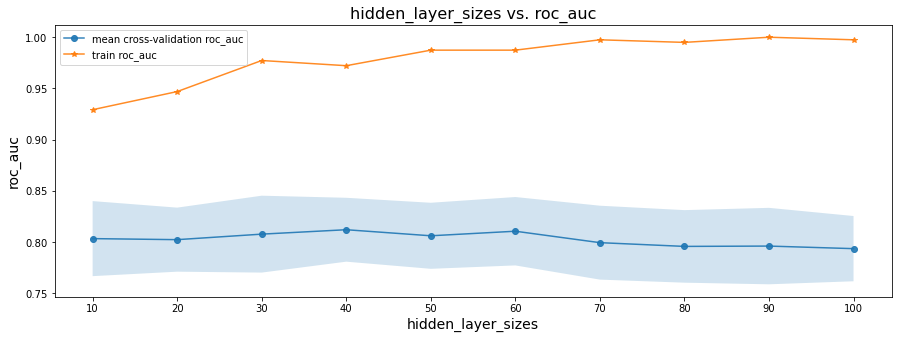

In [189]:
hidden_layer_sizes = [{'hidden_layer_sizes':x} for x in [(80, size2) for size2 in range(10,101, 10) ]]
cv_results = run_cross_validation(X_train_pca, y_train, hidden_layer_sizes, MLPClassifier, scoring='roc_auc', plot_args={'x_ticks': [x['hidden_layer_sizes'][1] for x in hidden_layer_sizes]})
print(max(cv_results[0]))
print(cv_results[3])
print(cv_results[0])

Starting run 1 out of 9
Starting run 2 out of 9
Starting run 3 out of 9
Starting run 4 out of 9
Starting run 5 out of 9
Starting run 6 out of 9
Starting run 7 out of 9
Starting run 8 out of 9
Starting run 9 out of 9
0.8051478696741855
{'hidden_layer_sizes': (80, 40), 'solver': 'lbfgs', 'max_iter': 20}
[0.80184586 0.80227381 0.80514787 0.79997431 0.76599749 0.75818484
 0.76556548 0.78178509 0.7367099 ]


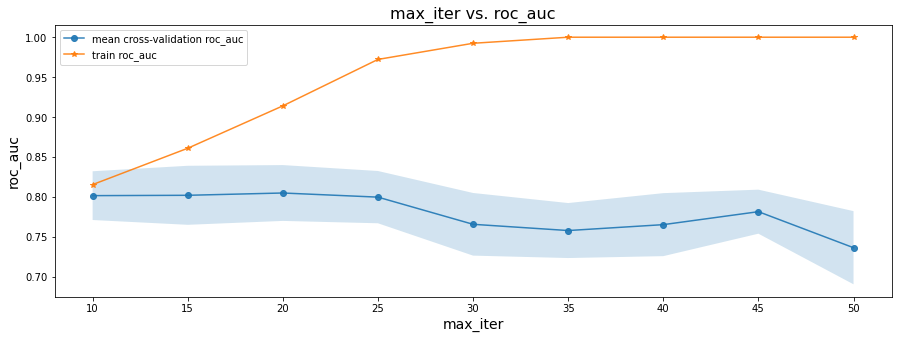

In [277]:
hidden_layer_sizes = [{'hidden_layer_sizes':(80, 40), 'max_iter':x} for x in range(50, 301, 25)]
cv_results = run_cross_validation(X_train_pca, y_train, hidden_layer_sizes, MLPClassifier, scoring='roc_auc', plot_args={'plot_hyperparam': 'max_iter'})
print(max(cv_results[0]))
print(cv_results[3])
print(cv_results[0])

Starting run 1 out of 11
Starting run 2 out of 11
Starting run 3 out of 11
Starting run 4 out of 11
Starting run 5 out of 11
Starting run 6 out of 11
Starting run 7 out of 11
Starting run 8 out of 11
Starting run 9 out of 11
Starting run 10 out of 11
Starting run 11 out of 11
0.8295162907268171
{'hidden_layer_sizes': (40,), 'max_iter': 175}
[0.80565664 0.8116297  0.80705138 0.8127005  0.82123872 0.82951629
 0.81730388 0.8233208  0.82853947 0.81163033 0.81514286]


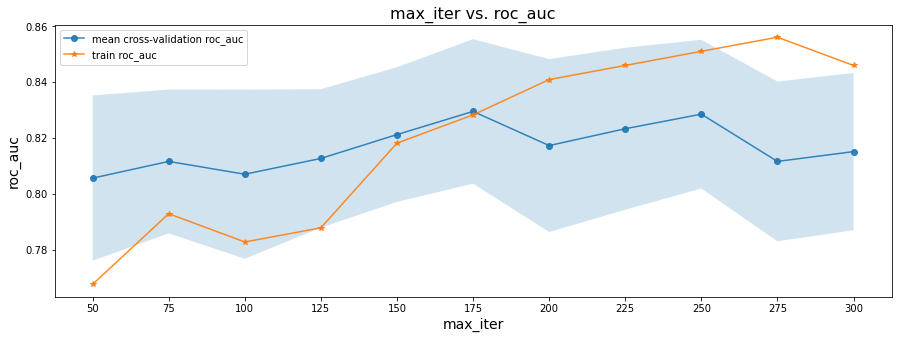

In [284]:
hidden_layer_sizes = [{'hidden_layer_sizes':(40, ), 'max_iter':x} for x in range(50, 301, 25)]
cv_results = run_cross_validation(X_train_pca, y_train, hidden_layer_sizes, MLPClassifier, scoring='roc_auc', plot_args={'plot_hyperparam': 'max_iter'})
print(max(cv_results[0]))
print(cv_results[3])
print(cv_results[0])

Starting run 1 out of 49
Starting run 2 out of 49
Starting run 3 out of 49
Starting run 4 out of 49
Starting run 5 out of 49
Starting run 6 out of 49
Starting run 7 out of 49
Starting run 8 out of 49
Starting run 9 out of 49
Starting run 10 out of 49
Starting run 11 out of 49
Starting run 12 out of 49
Starting run 13 out of 49
Starting run 14 out of 49
Starting run 15 out of 49
Starting run 16 out of 49
Starting run 17 out of 49
Starting run 18 out of 49
Starting run 19 out of 49
Starting run 20 out of 49
Starting run 21 out of 49
Starting run 22 out of 49
Starting run 23 out of 49
Starting run 24 out of 49
Starting run 25 out of 49
Starting run 26 out of 49
Starting run 27 out of 49
Starting run 28 out of 49
Starting run 29 out of 49
Starting run 30 out of 49
Starting run 31 out of 49
Starting run 32 out of 49
Starting run 33 out of 49
Starting run 34 out of 49
Starting run 35 out of 49
Starting run 36 out of 49
Starting run 37 out of 49
Starting run 38 out of 49
Starting run 39 out o

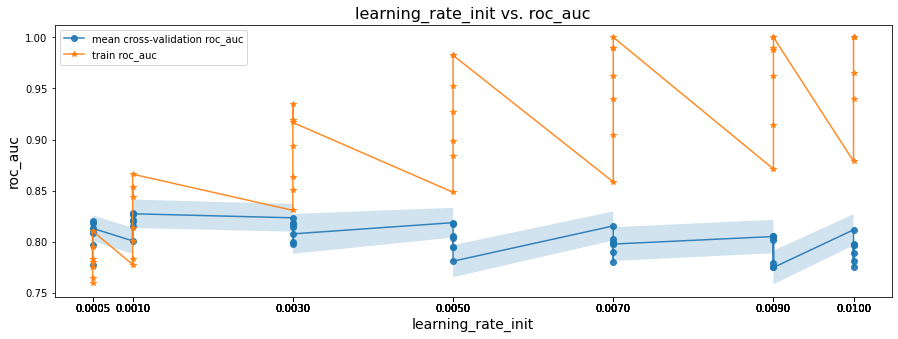

In [346]:
hidden_layer_sizes = [{'hidden_layer_sizes':(40, ), 'max_iter':mi, 'learning_rate_init':lr} for lr in [.0005, .001, .003, .005, .007, .009, .01] for mi in range(60, 301, 40)]
cv_results = run_cross_validation(X_train_pca, y_train, hidden_layer_sizes, MLPClassifier, scoring='roc_auc', plot_args={'plot_hyperparam': 'learning_rate_init'})
print(max(cv_results[0]))
print(cv_results[3])
print(cv_results[0])

In [347]:
mlp_model = MLPClassifier(hidden_layer_sizes=(40,), max_iter=220, learning_rate_init=.001)
mlp_model.fit(X_train_pca, y_train)
y_pred = mlp_model.predict(scale_pca_pipe.transform(X_test))

'''tree_model = DecisionTreeClassifier(max_depth=2)
tree_model.fit(X_train_new, y_train)
y_pred = tree_model.predict(kbest.transform(X_test))'''

'''random_forest_model = RandomForestClassifier(n_estimators=20)
random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)
'''

NameError: name 'scale_pca_pipe' is not defined

In [348]:
metrics.confusion_matrix(y_test, y_pred)

array([[66, 16],
       [19, 70]], dtype=int64)

In [349]:
metrics.accuracy_score(y_test, y_pred)

0.7953216374269005

In [350]:
metrics.roc_auc_score(y_test, y_pred)

0.7956974513565361

In [351]:
metrics.matthews_corrcoef(y_test, y_pred)

0.5909092902846267

In [352]:
metrics.f1_score(y_test, y_pred)


0.8

In [353]:
sorted_idx = np.argsort(cv_results[0], )

In [354]:
param_sets = cv_results[-1]
param_sets = np.array(param_sets)
param_sets[sorted_idx]


array([{'hidden_layer_sizes': (40,), 'max_iter': 300, 'learning_rate_init': 0.009},
       {'hidden_layer_sizes': (40,), 'max_iter': 260, 'learning_rate_init': 0.01},
       {'hidden_layer_sizes': (40,), 'max_iter': 180, 'learning_rate_init': 0.009},
       {'hidden_layer_sizes': (40,), 'max_iter': 60, 'learning_rate_init': 0.0005},
       {'hidden_layer_sizes': (40,), 'max_iter': 260, 'learning_rate_init': 0.009},
       {'hidden_layer_sizes': (40,), 'max_iter': 260, 'learning_rate_init': 0.007},
       {'hidden_layer_sizes': (40,), 'max_iter': 300, 'learning_rate_init': 0.005},
       {'hidden_layer_sizes': (40,), 'max_iter': 140, 'learning_rate_init': 0.01},
       {'hidden_layer_sizes': (40,), 'max_iter': 220, 'learning_rate_init': 0.01},
       {'hidden_layer_sizes': (40,), 'max_iter': 180, 'learning_rate_init': 0.007},
       {'hidden_layer_sizes': (40,), 'max_iter': 220, 'learning_rate_init': 0.005},
       {'hidden_layer_sizes': (40,), 'max_iter': 180, 'learning_rate_init': 0.0

In [355]:
cv_results[0][sorted_idx[::-1]]


array([0.82845238, 0.8275119 , 0.82745489, 0.82351128, 0.82104386,
       0.82037218, 0.82014098, 0.81877569, 0.81849311, 0.81812281,
       0.81742168, 0.8171297 , 0.81556642, 0.81526566, 0.81439035,
       0.81323058, 0.81197995, 0.81175877, 0.80837907, 0.80780952,
       0.80619173, 0.80583709, 0.80548058, 0.80522118, 0.8034317 ,
       0.80270301, 0.80199561, 0.80099499, 0.8001297 , 0.79941103,
       0.79814787, 0.79807519, 0.79785652, 0.79757895, 0.79672306,
       0.79665414, 0.79649373, 0.79530827, 0.79488095, 0.78973997,
       0.78885902, 0.78140163, 0.78110965, 0.78064599, 0.77910401,
       0.77728509, 0.77585526, 0.77558333, 0.77498308])